# Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib as plot

#  Import and read the HAM10000_metadata.csv.
import pandas as pd 
metadata_df = pd.read_csv("resources/HAM10000_metadata.csv")
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
# Drop the non-beneficial ID columns
metadata_df = metadata_df.drop(['dx_type'],axis=1)
metadata_df.head()

,lesion_id,image_id,dx,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear


In [5]:
# Determine the number of unique values in each column.
metadata_df.nunique()

lesion_id        7470
image_id        10015
dx                  7
age                18
sex                 3
localization       15
dtype: int64

In [6]:
# Look at dx counts for binning
dx_counts = metadata_df['dx'].value_counts()
dx_counts

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [7]:
# Combine mel and bcc categories, rename as 'cancer'
metadata_df['dx'] = metadata_df['dx'].replace({'mel': 'Cancer', 'bcc': 'Cancer', 'nv': 'Mole'})
metadata_df

,lesion_id,image_id,dx,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear
...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,80.0,male,face


In [8]:
# Look at dx counts for binning
dx_counts = metadata_df['dx'].value_counts()
dx_counts

Mole      6705
Cancer    1627
bkl       1099
akiec      327
vasc       142
df         115
Name: dx, dtype: int64

In [9]:
# Determine which values to replace if counts are less than ...?
replace_dx = list(dx_counts[dx_counts < 1500].index)

# Replace in dataframe
for dx in replace_dx:
    metadata_df.dx = metadata_df.dx.replace(dx,"Other")
    
# Check to make sure binning was successful
metadata_df.dx.value_counts()

Mole      6705
Other     1683
Cancer    1627
Name: dx, dtype: int64

<AxesSubplot:ylabel='Density'>

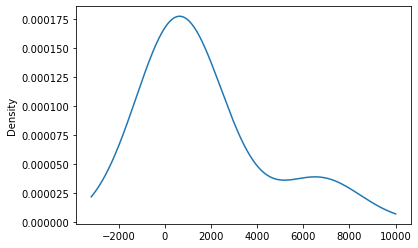

In [10]:
# Visualize the value counts of APPLICATION_TYPE
dx_counts.plot.density()

In [11]:
# Look at localization counts for binning
localization_counts = metadata_df['localization'].value_counts()
localization_counts

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ...?
replace_localization = list(localization_counts[localization_counts < 700].index)

# Replace in dataframe
for localization in replace_localization:
    metadata_df.localization = metadata_df.localization.replace(localization,"Other")
    
# Check to make sure binning was successful
metadata_df.localization.value_counts()

back               2192
lower extremity    2077
Other              1457
trunk              1404
upper extremity    1118
abdomen            1022
face                745
Name: localization, dtype: int64

<AxesSubplot:ylabel='Density'>

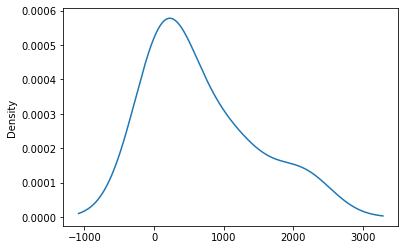

In [13]:
# Visualize the value counts of APPLICATION_TYPE
localization_counts.plot.density()

In [14]:
# Export cleaned csv
metadata_df.to_csv('metadata_filtered.csv')

In [15]:
# Generate our categorical variable lists
metadata_cat = metadata_df.dtypes[metadata_df.dtypes == "object"].index.tolist()
metadata_cat

['lesion_id', 'image_id', 'dx', 'sex', 'localization']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(metadata_df[metadata_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(metadata_cat)
encode_df.head()

,lesion_id_HAM_0000000,lesion_id_HAM_0000001,lesion_id_HAM_0000002,lesion_id_HAM_0000003,lesion_id_HAM_0000004,lesion_id_HAM_0000005,lesion_id_HAM_0000006,lesion_id_HAM_0000007,lesion_id_HAM_0000008,lesion_id_HAM_0000009,...,sex_female,sex_male,sex_unknown,localization_Other,localization_abdomen,localization_back,localization_face,localization_lower extremity,localization_trunk,localization_upper extremity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
metadata_df = metadata_df.merge(encode_df,left_index=True, right_index=True)
metadata_df = metadata_df.drop(metadata_cat,axis=1)
metadata_df.head()

,age,lesion_id_HAM_0000000,lesion_id_HAM_0000001,lesion_id_HAM_0000002,lesion_id_HAM_0000003,lesion_id_HAM_0000004,lesion_id_HAM_0000005,lesion_id_HAM_0000006,lesion_id_HAM_0000007,lesion_id_HAM_0000008,...,sex_female,sex_male,sex_unknown,localization_Other,localization_abdomen,localization_back,localization_face,localization_lower extremity,localization_trunk,localization_upper extremity
0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = metadata_df['dx_Cancer'].values
X = metadata_df.drop(['dx_Cancer'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78,stratify=y)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train, and Evaluate the Model

In [20]:
import tensorflow as tf

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 3

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 157491    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 157,525
Trainable params: 157,525
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Train on 7511 samples
Epoch 1/100
7511/7511 [==============================] - 2s 273us/sample - loss: nan - accuracy: 0.8305
Epoch 2/100
7511/7511 [==============================] - 1s 141us/sample - loss: nan - accuracy: 0.8376
Epoch 3/100
7511/7511 [==============================] - 1s 166us/sample - loss: nan - accuracy: 0.8376
Epoch 4/100
7511/7511 [==============================] - 1s 143us/sample - loss: nan - accuracy: 0.8376
Epoch 5/100
7511/7511 [==============================] - 1s 146us/sample - loss: nan - accuracy: 0.8376
Epoch 6/100
7511/7511 [==============================] - 1s 136us/sample - loss: nan - accuracy: 0.8376
Epoch 7/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 8/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 9/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 10/100
7511/7511 [==================

7511/7511 [==============================] - 1s 136us/sample - loss: nan - accuracy: 0.8376
Epoch 79/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 80/100
7511/7511 [==============================] - 1s 137us/sample - loss: nan - accuracy: 0.8376
Epoch 81/100
7511/7511 [==============================] - 1s 137us/sample - loss: nan - accuracy: 0.8376
Epoch 82/100
7511/7511 [==============================] - 1s 136us/sample - loss: nan - accuracy: 0.8376
Epoch 83/100
7511/7511 [==============================] - 1s 137us/sample - loss: nan - accuracy: 0.8376
Epoch 84/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 85/100
7511/7511 [==============================] - 1s 141us/sample - loss: nan - accuracy: 0.8376
Epoch 86/100
7511/7511 [==============================] - 1s 135us/sample - loss: nan - accuracy: 0.8376
Epoch 87/100
7511/7511 [==============================] - 1s 135us/s

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2504/1 - 0s - loss: nan - accuracy: 0.8375
Loss: nan, Accuracy: 0.8374600410461426


In [25]:
# Export our model to HDF5 file
nn.save("h5/CancerIdentification.h5")

In [26]:
nn_imported = tf.keras.models.load_model('h5/CancerIdentification.h5')

In [27]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2504/1 - 0s - loss: nan - accuracy: 0.8375
Loss: nan, Accuracy: 0.8374600410461426


In [29]:
# Saving model to disk
pickle.dump(fit_model, open('CancerIdentification.pkl','wb'))

# Loading model to compare the results
fit_model = pickle.load(open('CancerIdentification.pkl','rb'))
print(fit_model.predict([[2, 9, 6]]))

TypeError: can't pickle _thread._local objects